### Imports

In [140]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

import os
import numpy as np
import cv2

from matplotlib import pyplot as plt


#### Getting images from the data folder

In [141]:
data_dir = 'coin_data'

# Loop in every folder in the coin data forlder
for img_class in os.listdir(data_dir):
    
    # Loop for every image in the subfolders in coin data folder
    for image in os.listdir(os.path.join(data_dir, img_class)):
        img_path = os.path.join(data_dir, img_class, image)
        
        try:
            img = cv2.imread(img_path)
        except Exception as e:
            print(f"Error loading image {img_path}")

#### Loading the data

In [142]:
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size=20,
    image_size=(200, 200)
)

Found 800 files belonging to 4 classes.


#### Normalizing the data

In [143]:
data = data.map(lambda x, y: (x/255, y))

#### Accessing the data

In [144]:
data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()
batch[0].shape

(20, 200, 200, 3)

#### Labels of the data 

In [145]:
'''
0 = ten peso 
1 = one peso
2 = twenty peso
3 = five peso
'''
batch[1]

array([3, 0, 2, 0, 3, 1, 1, 1, 2, 0, 1, 2, 3, 1, 3, 1, 1, 1, 3, 0])

#### Visualize the data images with labels

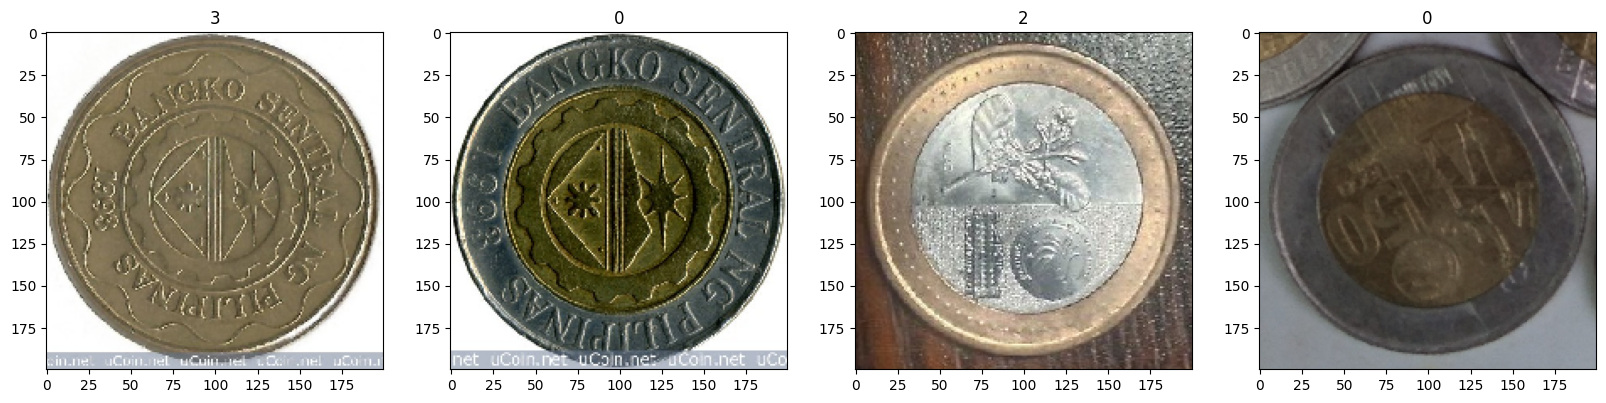

In [146]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for i, img in enumerate(batch[0][:4]):
    ax[i].imshow(img)
    ax[i].title.set_text(batch[1][i])

#### Spliting the data into training, validation and testing (70%, 20%, 10%)

In [147]:
training_size = int(len(data) * 0.7)
validation_size = int(len(data) * 0.2)
testing_size = int(len(data) * 0.1)

train = data.take(training_size)
validation = data.skip(training_size).take(validation_size)
testing = data.skip(training_size+validation_size).take(testing_size)

#### Building the model

In [179]:
model = Sequential()

model.add(Conv2D(16, (2,2), 1, activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (2,2), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(4, activation='softmax'))

C:\Users\Bazar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


#### Compiling the model

In [180]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Model summary

In [181]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 199, 199, 16)      │        208 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 99, 99, 16)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_40 (Conv2D)              │ (None, 98, 98, 32)        │      2,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 49, 49, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_15 (Flatten)            │ (None, 76832)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_31 (Dense)                │ (None, 128)               │  9,834,624 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_9 (Dropout)             │ (None, 128)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_32 (Dense)                │ (None, 64)                │      8,256 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_10 (Dropout)            │ (None, 64)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_33 (Dense)                │ (None, 4)                 │        260 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 9,845,428 (37.56 MB)

 Trainable params: 9,845,428 (37.56 MB)

 Non-trainable params: 0 (0.00 B)

#### Training the model

In [182]:
performance = model.fit(train, epochs=20, validation_data=validation)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 308ms/step - accuracy: 0.2415 - loss: 4.0834 - val_accuracy: 0.4000 - val_loss: 1.2961
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 270ms/step - accuracy: 0.3615 - loss: 1.3253 - val_accuracy: 0.7500 - val_loss: 0.8997
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 267ms/step - accuracy: 0.6010 - loss: 0.9737 - val_accuracy: 0.8125 - val_loss: 0.5868
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 264ms/step - accuracy: 0.6657 - loss: 0.7698 - val_accuracy: 0.7063 - val_loss: 0.6252
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 264ms/step - accuracy: 0.7867 - loss: 0.5610 - val_accuracy: 0.8687 - val_loss: 0.3760
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 270ms/step - accuracy: 0.8641 - loss: 0.4306 - val_accuracy: 0.9062 - val_loss: 0.2770
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 273ms/step - accuracy: 0.8896 - loss: 0.3239 - val_accuracy: 0.8687 - val_loss: 0.3076
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 264ms/step - accuracy: 0.9127 - loss: 0.2520 - val_accuracy: 0

#### Graph the model performance

Text(0.5, 0.98, 'Performance')

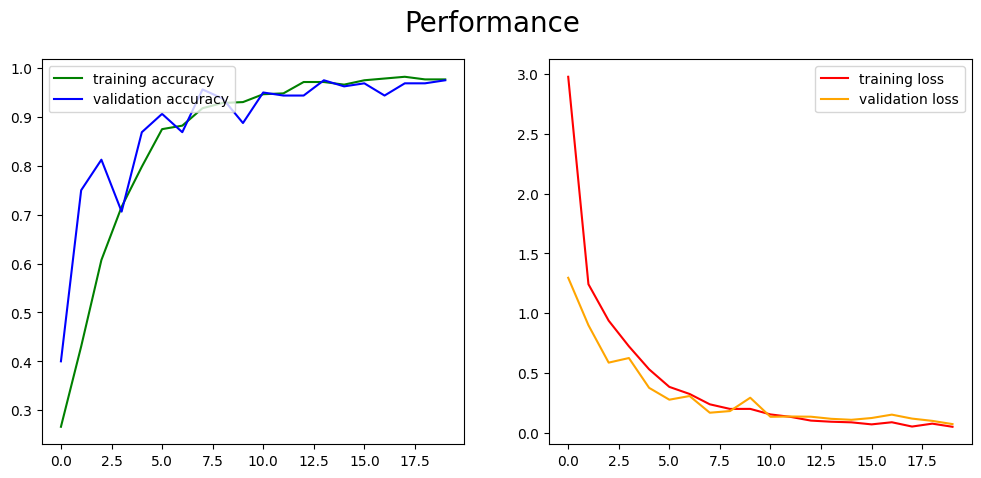

In [183]:
figure, graph = plt.subplots(ncols=2, figsize=(12, 5))

graph[0].plot(performance.history['accuracy'], color='green', label='training accuracy')
graph[0].plot(performance.history['val_accuracy'], color='blue', label='validation accuracy')
graph[0].legend(loc='upper left')

graph[1].plot(performance.history['loss'], color='red', label='training loss')
graph[1].plot(performance.history['val_loss'], color='orange', label='validation loss')
graph[1].legend(loc='upper right')

figure.suptitle('Performance', fontsize=20)

#### Testing on a new coin image

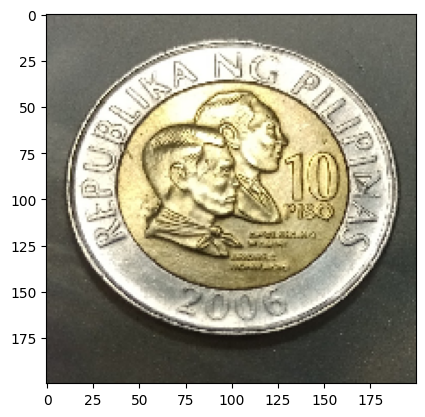

In [221]:
img = cv2.imread('sample_10_peso.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [222]:
prediction = model.predict(np.expand_dims(img/255, 0)) 

classes = [' 1 peso', ' 5 peso', '10 peso', '20 peso']

for i, probability in enumerate(prediction[0]):
    print(f"{classes[i]}: {probability * 100: .2f}%")
    
print(f"\nThe coin provided is a {classes[np.argmax(prediction)]} coin.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
 1 peso:  0.40%
 5 peso:  25.11%
10 peso:  74.25%
20 peso:  0.25%

The coin provided is a 10 peso coin.
